In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5893,3549-ZTMNH,Male,0,Yes,Yes,12,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.0,269.65,No
4224,7602-DBTOU,Female,0,Yes,No,71,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.6,1416.5,No
274,5940-AHUHD,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,70.6,70.6,Yes
5396,5627-TVBPP,Female,0,No,Yes,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.1,644.5,No
2787,9838-BFCQT,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.1,1851.45,No


## First thing we need to do is to drop useless ID

In [26]:
df.drop(columns=["customerID"],inplace=True)
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4105,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),106.70,7009.5,No
1730,Male,0,No,No,1,Yes,Yes,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,59.85,59.85,Yes
3738,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
2608,Male,0,Yes,Yes,7,No,No phone service,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,34.50,279.25,Yes
4985,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),83.30,6042.7,No


In [27]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [28]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

## For some reason TotalCharges is a string so we better change it it to a number

In [31]:
pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

## Some entries have " " spaces in them and it's unable to replace them

In [32]:
pd.to_numeric(df['TotalCharges'],errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

## errors="coerce" just ignored the empty spaces

In [33]:
df["TotalCharges"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

## This way it's not gonna show which rows are null

In [34]:
df[pd.to_numeric(df['TotalCharges'],errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


## See a particular row

In [35]:
df.iloc[488] 
# df.iloc[488: 490] # will show 2 rows as a table

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

## Doing it this way, will let us find empty spaces

In [36]:
df[pd.to_numeric(df['TotalCharges'],errors="coerce").isnull()].shape

(11, 20)

## Since it's only 11 rows, we can drop them

In [37]:
df = df[df['TotalCharges']!= " "]
df[pd.to_numeric(df['TotalCharges'],errors="coerce").isnull()].shape
# now its 0

(0, 20)

In [38]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## We still haven't converted String values to Float because of the previous error

In [39]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Next, check the nulls, remove if necessary

In [40]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Let's visualize

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64


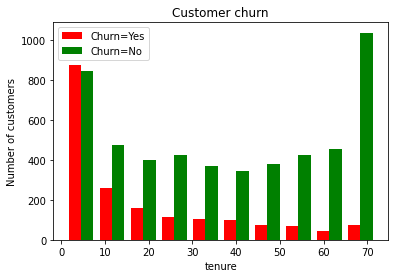

In [41]:
# get those who aren't leaving
df_no = df[df["Churn"] == "No"]

# Get tenure
df_no_tenure = df_no.tenure

df_yes_tenure = df[df["Churn"] == "Yes"].tenure
print(df_yes_tenure)

plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("Customer churn")
plt.hist([df_yes_tenure, df_no_tenure], color=['red','green'], label=["Churn=Yes", "Churn=No"])
plt.legend()

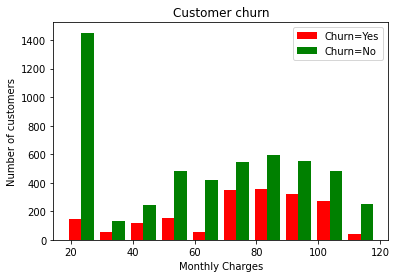

In [42]:
# get those who aren't leaving
df_no = df[df["Churn"] == "No"]

# Get tenure
df_no_mcharges = df_no.MonthlyCharges

df_yes_mcharges = df[df["Churn"] == "Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.title("Customer churn")
plt.hist([df_yes_mcharges, df_no_mcharges], color=['red','green'], label=["Churn=Yes", "Churn=No"])
plt.legend()

## Get all unique column values

In [43]:
def print_unique_values():
    for column in df:
        if df[column].dtypes == "object":
            print(f"{column}: {df[column].unique()}")
print_unique_values()

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## We wanna replace **NO internet service and no phone service** with no as both mean negative

In [44]:
#Its very simple to replace something in pandas
df.replace("No internet service", "No",inplace=True)
df.replace("No phone service", "No",inplace=True)

print_unique_values()

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## Label encoding

In [45]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1, 'No': 0}, inplace=True)

df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [46]:
print_unique_values()

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [48]:
df["gender"].replace({"Female":0, "Male":1}, inplace=True)
df = pd.get_dummies(data=df,columns=['InternetService', 'Contract', 'PaymentMethod'],drop_first=True)

KeyError: "None of [Index(['InternetService', 'Contract', 'PaymentMethod'], dtype='object')] are in the [columns]"

In [49]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1194,0,0,0,0,14,1,0,0,1,0,...,50.45,765.45,0,0,0,0,0,0,1,0
3830,1,0,1,0,4,1,1,0,1,0,...,100.20,420.20,1,1,0,0,0,0,1,0
4862,0,0,0,0,2,1,0,0,0,0,...,70.95,137.95,1,1,0,0,0,0,1,0
4701,1,1,0,0,21,1,1,0,1,1,...,104.35,2271.85,0,1,0,0,0,0,1,0
6354,0,0,1,0,61,1,0,1,1,0,...,93.70,5860.70,0,1,0,1,0,0,0,0


In [51]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

## All numbers

## We need to scale our data to be in 0 to 1 range

In [53]:
cols_to_scale = ["tenure","MonthlyCharges", "TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3931,0,0,1,0,0.338028,1,0,1,1,0,...,0.525373,0.209889,0,0,0,0,0,0,0,1
3974,1,0,1,0,0.507042,1,1,1,0,1,...,0.606965,0.333833,0,0,0,1,0,0,0,1
1093,0,0,1,1,0.985915,1,1,1,0,1,...,0.817910,0.824013,0,1,0,0,1,0,1,0
1256,0,0,1,1,1.000000,1,1,1,0,1,...,0.673134,0.702971,0,0,0,0,1,1,0,0
1779,0,0,0,0,0.014085,1,0,1,1,0,...,0.725373,0.017274,0,1,0,0,0,0,1,0


## We are ready to split our data

In [57]:
X = df.drop("Churn", axis="columns")
y = df["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape,end=" = X_train\n")
print(X_test.shape,end=" = X_test")

(5625, 23) = X_train
(1407, 23) = X_test

In [212]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report


def ANN(X_train, y_train, X_test, y_test, weights=-1, loss="binary_crossentropy",):
    
    model = keras.Sequential([
        keras.layers.Dense(23, input_shape=(23,), activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ])

    model.compile(optimizer="adam", loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        H = model.fit(X_train,y_train, epochs=100, validation_data=(X_test, y_test))
    else:
        H = model.fit(X_train,y_train, epochs=100, validation_data=(X_test, y_test), class_weight = weights)
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Class report: \n", classification_report(y_test,y_preds))

    return (y_preds,H)

y_preds,H = ANN(X_train, y_train, X_test, y_test)

Epoch 1/100
259/259 [==============================] - 2s 2ms/step - loss: 0.5555 - accuracy: 0.7178 - val_loss: 0.4804 - val_accuracy: 0.7812
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7752 - val_loss: 0.4617 - val_accuracy: 0.7914
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.7810 - val_loss: 0.4581 - val_accuracy: 0.7904
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.7840 - val_loss: 0.4554 - val_accuracy: 0.7948
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7855 - val_loss: 0.4534 - val_accuracy: 0.7880
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.7861 - val_loss: 0.4511 - val_accuracy: 0.7875
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.7852 - val_loss: 0.4489 - val_accuracy: 0.7880

## Visualize the losses/accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


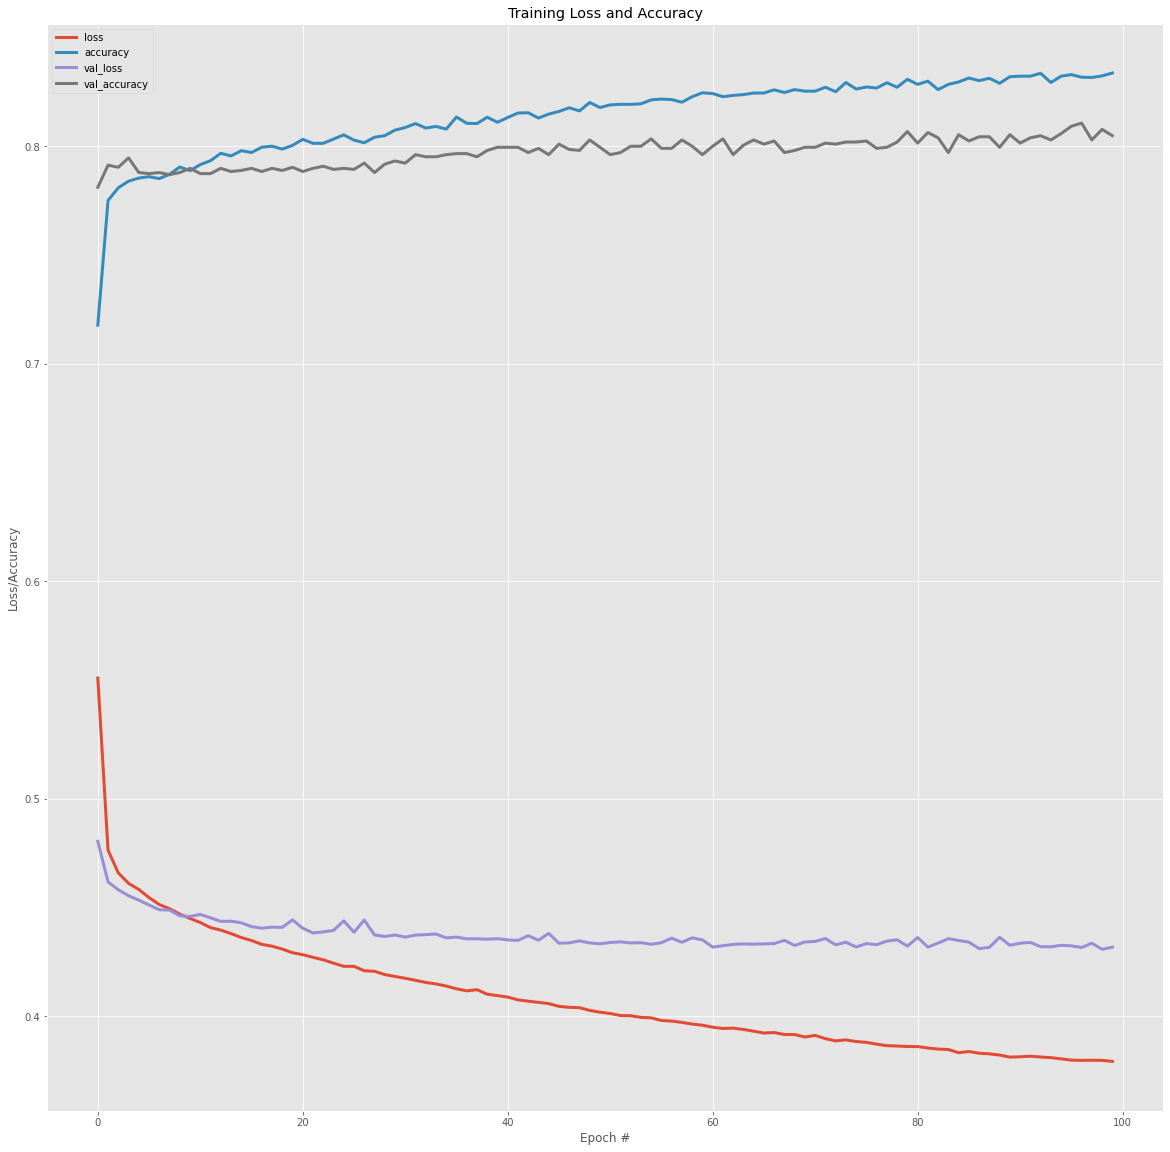

In [213]:
plt.style.use("ggplot")
plt.figure(figsize=(20, 20))

(loss,vall_loss,accuracy,val_accuracy) = H.history
print(H.history.keys())
for key in H.history.keys():
    item = H.history[key]
    plt.plot(np.arange(0,  len(item)), item, label=key,linewidth=3)

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")

plt.legend()
plt.savefig("adam.png")
plt.show()

## Our f1 score for 0 is 0.87 but it's quite low for 1 (0.60)
1. That comes from having imbalanced datasets, there are far more people who stay with a business than those who leave(otherwise they'd get bankrupt)
1. Accuracy doesn't matter if our data is imbalanced

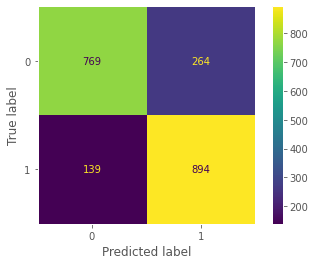

In [215]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_preds)
plt.grid(False)
plt.savefig("adam-cm.png")

## Handling imbalanced datasets

In [189]:
y_train.value_counts()

0    4118
1    1507
Name: Churn, dtype: int64

In [193]:
# divide
df_class_0 = df[df["Churn"] == 0]
df_class_1 = df[df["Churn"] == 1]
print(f"df_class_0:{df_class_0.shape} \ndf_class_1:{df_class_1.shape}")

df_class_0:(5163, 24) 
df_class_1:(1869, 24)


## Method 3: SMOTE
1. Creates synthetic samples by usng k-nearest-neighbor

In [201]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2,stratify=y_sm)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

y_preds,H = ANN(X_train, y_train, X_test, y_test)

(8260, 23) (8260,)
(2066, 23) (2066,)
Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.6560 - accuracy: 0.6206 - val_loss: 0.5927 - val_accuracy: 0.7197
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.7470 - val_loss: 0.5308 - val_accuracy: 0.7561
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7609 - val_loss: 0.5010 - val_accuracy: 0.7585
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7689 - val_loss: 0.4874 - val_accuracy: 0.7691
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7714 - val_loss: 0.4782 - val_accuracy: 0.7759
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7737 - val_loss: 0.4725 - val_accuracy: 0.7773
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.7768 - v